<div style="text-align: center; font-size: 32px; font-weight: bold;">
    Back Propagation Prerequisit
</div>

Before jumping into backpropagation Example, let's dig deep in the concept of Linear Regression.
<div style="text-align: center; font-size: 32px; font-weight: bold;">
    Linear Regression and Gradient Descent
</div>

__Further Reading__
- Linear Regression: https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html
- Gradient Descent: https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html

### [1] Linear Regression in Python - 
- In Regression we want to predict continuous values.
- In classification we want to predict discrete values like a class label $0$ or $1$.
- If we look some data, we want to approximate this data using a linear function. So we can define the approxiamtion

&rArr; __Approximation:__ Linear equation (equation of line)

$$\hat{y} = wx + b$$

$w$ is the slope and $b$ is the bias / intercept/ shift on the y axis for 2D case. 

&rArr; __Task:__ We have to come up with an algorithm to find $w$ and $b$. For that we have to define cost function. 


&rArr; __Cost function:__ In linear regression we commonly define erros as  _Mean Squared Error (MSE)._

$$MSE = J(w,b) = \frac{1}{N} \sum_{i=1}^{n} (y_i - (wx_i + b))^2$$

$y_i $ is true values and $(wx_i + b)$ is the calculated value.

This is difference between actial and approxiamated value. than we sqaure the difference and sum all the sample and divide by total number of sample to get mean error.

We want to minimise this error. To find the minimum we have to determine the derivatives or gradients w.r.t. model paramaters. So we want to calculate the _gradeint_ w.r.t. model or input parameters $w$ and $b$. Here is the formula for the gradient,

$$
J'(w,b) =
\begin{bmatrix}
\frac{\partial f}{\partial w} \\
\frac{\partial f}{\partial b} \\
\end{bmatrix}
=
\begin{bmatrix}
\frac{1}{N} \sum - 2x_i (y_i - (wx_i+b))\\
\frac{1}{N} \sum - 2(y_i - (wx_i+b))\\
\end{bmatrix}
$$

### [2] Gradient Descent
With the above gradient $J'(w,b)$, we use a technique called gradient descent to minimse the error. If we have a parabolic cost function and we initilise our weight and bias at certain point. than we want to go in the direction of steepest descent. Steepest descent is also the gradeint, i/.e., we want to got ot the negative direction of gradient and do this iteratively to fing the minimum. For each iteration, we have update rule for new weight and new bias.

### Update Rules
$$w_{new} = w_{old} - \alpha \cdot dw $$

We subtract the value because we want to go in descent direction. $\alpha$ is the learning rate or step size. 

$$b_{new} = b_{old} - \alpha \cdot db $$
$$\frac{dJ}{dw}=dw = \frac{1}{N}\sum_{i=1}^{N}- 2x_i (y_i - (wx_i+b)) =  \frac{1}{N}\sum_{i=1}^{N}- 2x_i (y_i - \hat{y}) = \frac{1}{N}\sum_{i=1}^{N}- 2x_i (\hat{y} - y_i)$$

$$\frac{dJ}{db} = db = \frac{1}{N}\sum_{i=1}^{N}- 2(y_i - (wx_i+b)) =  \frac{1}{N}\sum_{i=1}^{N}- 2(y_i - \hat{y}) = \frac{1}{N}\sum_{i=1}^{N}- 2(\hat{y} - y_i)$$

#### Learning rate
$\alpha$ is the learning rate or step size. 

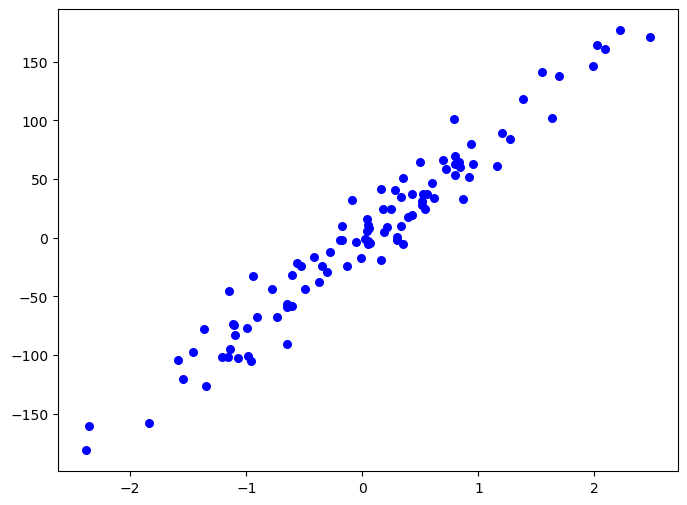

(80, 1)
(80,)


In [10]:
# Generate Example Data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4) # 100 samples and 1 feature for each sample

# Split data in train and test samples and teain and test labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234) # 1D row vector of size 80. For each training sample we ahve 1 lable

fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:,0],y, color='b', marker='o', s=30)
plt.show()

print(X_train.shape) #nd array of size (80,1)
print(y_train.shape)


# from linear_regression import LinearRegression

# regressor = LinearRegression()
# regressor.fit(X_train, y_train)
# predicted = regressor.predict(X_test)

# def mse(y_true, y_pred):
#     return np.mean((y_true - y_pred) ** 2)

# mse_value = mse(y_test, pred)


MSE: 783.8155465125494
Accuracy: 0.9253717934621976


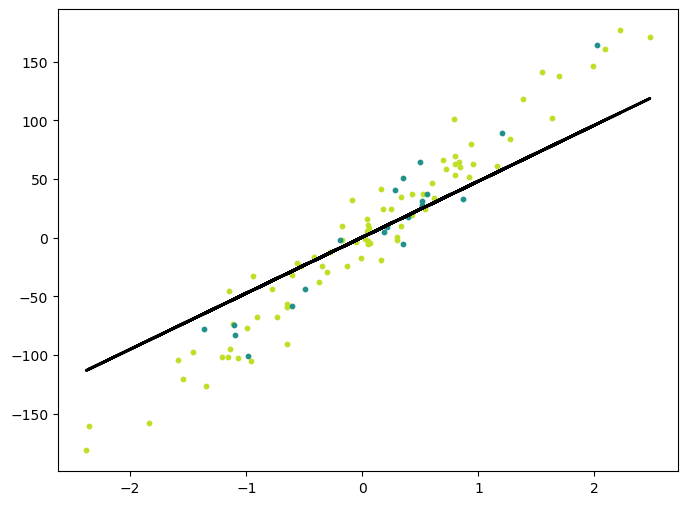

In [8]:
import numpy as np

def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

# Define a class 
class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000): # lets give a default learnign rate and number of iterations
        # Simple store these values here
        self.lr = learning_rate
        self.n_iters = n_iters
        # Define weights and bias
        self.weights = None
        self.bias = None

    # Defeine the functions
    def fit(self, X, y): # fit method take training samples and label. this invleve training step and gradeint descent
        # intialize parameters for gradient Descent
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0 

        # gradient descent: It is an iterative process
        for _ in range(self.n_iters):
            # new weight = old weight -\alpha*dw
            # Approxiamtion: linear y = w.x + b
            y_predicted = np.dot(X, self.weights) + self.bias
            
            # compute gradients or derivatives
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) # we can omit 2 as its a scaling factor
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X): # approximate the value for new vlues
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated


# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

    regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    print("MSE:", mse)

    accu = r2_score(y_test, predictions)
    print("Accuracy:", accu)

    y_pred_line = regressor.predict(X)
    cmap = plt.get_cmap("viridis")
    fig = plt.figure(figsize=(8, 6))
    m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
    m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
    plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
    plt.show()

## Example - PyTorch implementation: 
We model our output with a linear combination of some weights and input so $\hat{y} = w.x$. We formualte the loss ficntion. For simplicity, let's assume is squared error instead of MSE.

$$Loss = (predicted_y - actual_y)^2$$

$$Loss = (\hat{y} - y)^2$$

To minimise the loss we apply three steps.
1. __Forward Pass:__ Compute Loss
2. __Compute Local Gradients__
3. __Backward Pass:__ Compute $dLoss/dWeight$ using Chain Rule

```python
import torch

x = torch.tensor(1.0) y = torch.tensor(2.0)

# This is the parameter we want to optimize -> requires_grad=True
w = torch.tensor(1.0, requires_grad=True)

# forward pass to compute loss
y_predicted = w * x
loss = (y_predicted - y)**2
print(loss)

# backward pass to compute gradient dLoss/dw
loss.backward()
print(w.grad)

# update weights
# next forward and backward pass...

# continue optimizing:
# update weights, this operation should not be part of the computational graph
with torch.no_grad():
    w -= 0.01 * w.grad
# don't forget to zero the gradients
w.grad.zero_()

# next forward and backward pass...

```

## 🎉 **Thank You!** 🙌  
### 🚀 Happy Coding & Keep Learning! 💡

## <span style="color: yellow;">We will see the Backpropagation with detailed theory and example in next notebook</span>